In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
datos = pd.read_csv("videogames-sales.csv" )
df=pd.DataFrame(datos)

In [5]:
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [6]:
print(df.count())

Rank            16598
Name            16598
Platform        16598
Year            16327
Genre           16598
Publisher       16540
NA_Sales        16598
EU_Sales        16598
JP_Sales        16598
Other_Sales     16598
Global_Sales    16598
dtype: int64


In [7]:
df.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,8300.605254,2006.406443,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,5.828981,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


In [9]:
# I. obtener los nombres de la columnas
col_names = df.columns.tolist()

# II. for para recorrer la lista
for column in col_names:
    print ("valores nulos en <{0}>: {1}".format(column, df[column].isnull().sum()))

valores nulos en <Rank>: 0
valores nulos en <Name>: 0
valores nulos en <Platform>: 0
valores nulos en <Year>: 271
valores nulos en <Genre>: 0
valores nulos en <Publisher>: 58
valores nulos en <NA_Sales>: 0
valores nulos en <EU_Sales>: 0
valores nulos en <JP_Sales>: 0
valores nulos en <Other_Sales>: 0
valores nulos en <Global_Sales>: 0


Text(0.5, 1.0, 'Ventas globales por genero')

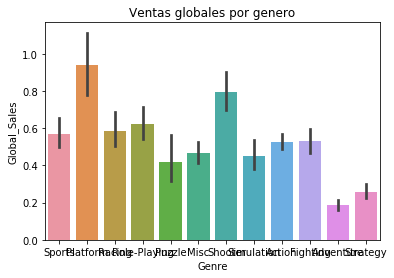

In [48]:
#sns.barplot(x='Genre', y='Global_Sales',orient='h', data=df)
sns.barplot(x='Genre', y='Global_Sales', data=df)
plt.title('Ventas globales por genero')


Text(0.5, 1.0, 'Grafico de Generos de Juegos')

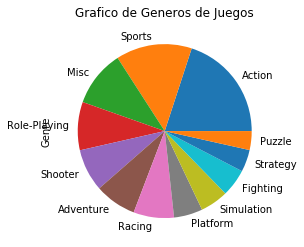

In [13]:
df.Genre.value_counts().plot(kind='pie')
plt.title('Grafico de Generos de Juegos')

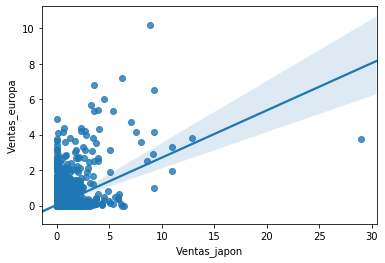

In [32]:
ventas_eu = df['EU_Sales']
ventas_jp = df['JP_Sales']

result = pd.concat([ventas_eu, ventas_jp], axis=1, join='outer')

df_ventas = result.replace(np.nan, '', regex=True)

df_ventas = pd.DataFrame(result)
df_ventas.columns = ['Ventas_europa', 'Ventas_japon']

sns.regplot(x="Ventas_europa", y="Ventas_japon", data=df_ventas);

In [40]:
print("Porcetaje de Juegos de deporte:", df["Platform"][df["Genre"] == 'Sports'].value_counts(normalize = True)[1]*100)

Porcetaje de Juegos de deporte: 11.12531969309463
